In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
#reading the dataset
df_train=pd.read_csv('C:\\Users\\shiva\\Downloads\\Walmart_Project\\walmart-recruiting-store-sales-forecasting\\train.csv')
df_features=pd.read_csv('C:\\Users\\shiva\\Downloads\\Walmart_Project\\walmart-recruiting-store-sales-forecasting\\features.csv')
df_stores=pd.read_csv('C:\\Users\\shiva\\Downloads\\Walmart_Project\\walmart-recruiting-store-sales-forecasting\\stores.csv')

# Merging the features from the tables

In [4]:
df=pd.merge(df_train,df_features,on=['Store','Date','IsHoliday'],how='inner')
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2/5/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2/5/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2/5/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2/5/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2/5/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,10/26/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,10/26/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,10/26/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,10/26/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [5]:
df=pd.merge(df,df_stores,on='Store',how='inner')
df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2/5/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2/5/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2/5/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2/5/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2/5/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
5,1,6,2/5/2010,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
6,1,7,2/5/2010,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
7,1,8,2/5/2010,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
8,1,9,2/5/2010,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9,1,10,2/5/2010,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


#  Checking for Null Values

In [6]:
df.isna().mean()*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

# Solving Null Values

In [7]:
from sklearn.impute import SimpleImputer

#Treating NaN values with Simple Imputer

markdown=pd.DataFrame(SimpleImputer().fit_transform(df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]),columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
df = df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
df=pd.concat([df,markdown],axis=1)

In [8]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
dtype: object

**Since date is of object datatype, I converted it to datetime type and extracting day,month,year from it separetely**

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
del df['Date']

**Treating the object and bool columns with Label Encoding**

In [10]:
from sklearn.preprocessing import LabelEncoder

df['Type']=LabelEncoder().fit_transform(df['Type'])
df['IsHoliday']=LabelEncoder().fit_transform(df['IsHoliday'])
df.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type              int32
Size              int64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
year              int64
month             int64
day               int64
dtype: object

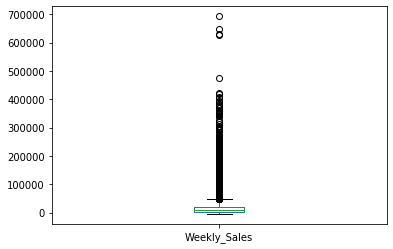

In [11]:
df['Weekly_Sales'].plot.box()

In [12]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'year', 'month',
       'day'],
      dtype='object')

# Standardizing the data and splitting the data into train and test for building the model

In [13]:
from scipy.stats import zscore 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = df.drop('Weekly_Sales',axis=1)
y = df['Weekly_Sales']
X_scaled = X.apply(zscore)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=34)
lr = LinearRegression()
dt= DecisionTreeRegressor()
rf = RandomForestRegressor()
models = [lr,dt,rf]

for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(r2_score(y_test,y_pred))

0.08508385525415985
0.9442707334472713
0.9707507728724206
